## Correlation between Tweet Sentiment and Stock Prices

In [1]:
import pandas as pd

In [2]:
symbols = ['AAPL', 'GOOGL', 'MSFT', 'TSLA', 'AMZN']

for symbol in symbols:
    df = pd.read_csv(f'data/{symbol}.csv', index_col='Date')

    df['Prev_Close'] = df.shift(1)['Close']
    df['Next_Close'] = df.shift(-1)['Close']

    df['Change_within_day'] = df.Close - df.Open
    df['Change_to_prev_day'] = df.Close - df.Prev_Close
    df['Change_to_next_day'] = df.Next_Close - df.Close
    df['Sent_diff'] = (df.sentiment_pos - df.sentiment_neg)/(df.sentiment_pos + df.sentiment_neg)

    print(f'{symbol} tweet sentiment correlation with daily price changes')
    display(df[['Sent_diff', 'Change_within_day', 'Change_to_prev_day', 'Change_to_next_day']].corr().iloc[0, :])

AAPL tweet sentiment correlation with daily price changes


Sent_diff             1.000000
Change_within_day     0.163307
Change_to_prev_day    0.249312
Change_to_next_day    0.066253
Name: Sent_diff, dtype: float64

GOOGL tweet sentiment correlation with daily price changes


Sent_diff             1.000000
Change_within_day     0.145150
Change_to_prev_day    0.192866
Change_to_next_day    0.041937
Name: Sent_diff, dtype: float64

MSFT tweet sentiment correlation with daily price changes


Sent_diff             1.000000
Change_within_day     0.139297
Change_to_prev_day    0.122006
Change_to_next_day    0.020528
Name: Sent_diff, dtype: float64

TSLA tweet sentiment correlation with daily price changes


Sent_diff             1.000000
Change_within_day     0.055861
Change_to_prev_day    0.109874
Change_to_next_day    0.026654
Name: Sent_diff, dtype: float64

AMZN tweet sentiment correlation with daily price changes


Sent_diff             1.000000
Change_within_day     0.145804
Change_to_prev_day    0.166588
Change_to_next_day    0.054869
Name: Sent_diff, dtype: float64

### Compare the above correlation with the correlation of the recommended accounts

In [3]:
rec_accounts = pd.read_csv('data/recommended_accounts.csv')
rec_accounts.head()

,company,usr_handle,correlation,tweet_count
0,TSLA,hd52time,0.299244,168.0
1,TSLA,Stockpro1221,0.280490,156.0
2,TSLA,iHotStockPicks,0.242819,333.0
3,TSLA,tq_equities,0.227989,429.0
4,TSLA,mdela0880,0.221920,189.0


In [4]:
symbols = ['AAPL',  'MSFT','GOOGL', 'TSLA', 'AMZN']

dataset = dict()

for symbol in symbols:
    df = pd.read_csv(f'data/{symbol}.csv', index_col='Date')
    df['Change_to_prev_day'] = df.Close - df.shift(1)['Close'] #previous day closing price
    df['Sent_diff'] = (df.sentiment_pos - df.sentiment_neg)/(df.sentiment_pos + df.sentiment_neg) #relative diff
    
    tweeters = rec_accounts[rec_accounts.company==symbol]
    var_name = symbol +' @'+ tweeters['usr_handle'].iat[0]
    dataset[var_name] = tweeters['correlation'].iat[0]
    
    var_name = symbol +' @'+ tweeters['usr_handle'].iat[1]
    dataset[var_name] = tweeters['correlation'].iat[1]
    
    var_name = symbol + ' all tweets'
    dataset[var_name] = df[['Sent_diff', 'Change_to_prev_day']].corr().iat[0,1]

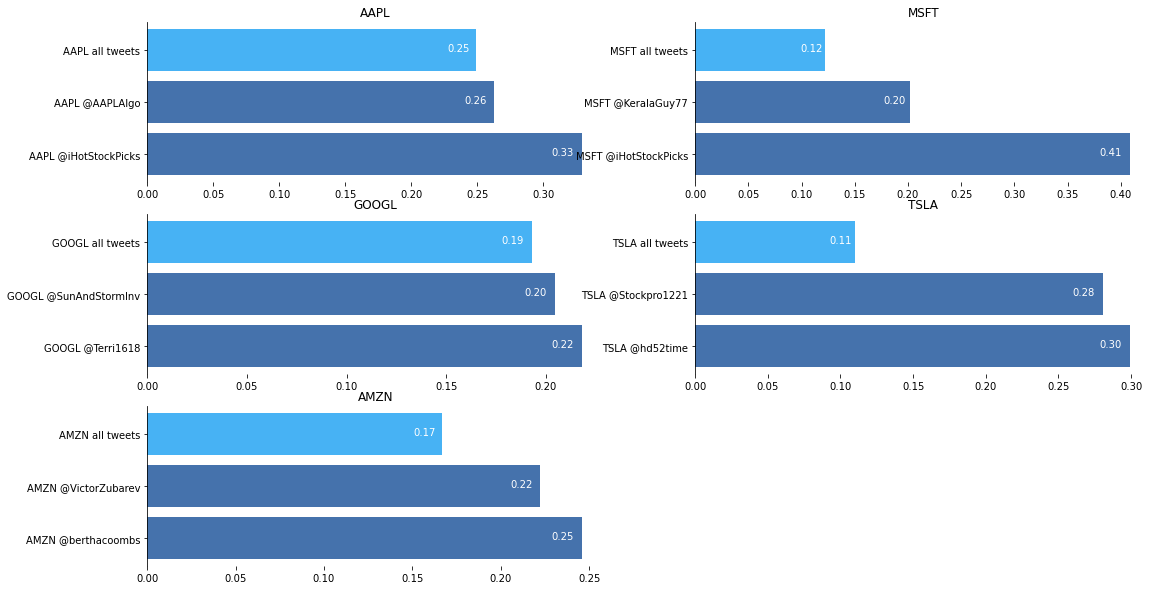

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18,10))
colors = ['#1b5299d0','#1b5299d0', '#1da1f2d0']

for i in range(0,5):
    ax = plt.subplot(3,2,i+1)
    ax.barh(list(dataset.keys())[3*i: 3*(i+1)], list(dataset.values())[3*i: 3*(i+1)], color=colors)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    for bar in ax.patches:
        width = bar.get_width()
        plt.text(bar.get_width()*0.98, bar.get_y()+0.55*bar.get_height(),
             '{:1.2f}'.format(width), ha='right', va='center', color='white')
    ax.set_title(symbols[i])

plt.tight_layout
plt.show()